# Customer Segmentation / Clustering

### 1. Importing Required Libraries

The first step is importing the libraries you’ll need for data manipulation, clustering, metrics calculation, and visualization.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, homogeneity_score, completeness_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 2. Loading Data

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

### 3. Merging the Data
Since you need to work with features from both the customers and transactions datasets, you merge them on the CustomerID column.
	

In [3]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

### 4. Feature Enginnering 

In [4]:
#Creating Customer Profile Features
customer_profile = merged_data.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    NumTransactions=('TransactionID', 'count')
).reset_index()

#Creating Transaction Features
transaction_features = merged_data.groupby('CustomerID').agg(
    AvgTransactionValue=('TotalValue', 'mean'),
    MaxTransactionValue=('TotalValue', 'max')
).reset_index()

# Combining Features
customer_features = pd.merge(customer_profile, transaction_features, on='CustomerID', how='left')

#Standardizing the Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features[['TotalSpend', 'NumTransactions', 'AvgTransactionValue', 'MaxTransactionValue']])

### 5.Agglomerative Clustering
With the features standardized, you can now apply Agglomerative Clustering, which is a type of hierarchical clustering.

In [5]:
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
customer_features['Cluster'] = agglomerative.fit_predict(features_scaled)

* The model is initialized with n_clusters=4, meaning the data will be grouped into 4 clusters. 
* linkage='ward' uses Ward’s minimum variance method, which minimizes the variance of clusters. 
* fit_predict computes the clustering labels for each customer and assigns them to the Cluster column. 

### 6.Evaluating the Clustering Performance

Now that the clustering is done, it’s important to evaluate how well the clustering algorithm performed using various metrics.

In [6]:
db_index = davies_bouldin_score(features_scaled, customer_features['Cluster'])
silhouette = silhouette_score(features_scaled, customer_features['Cluster'])
homogeneity = homogeneity_score(customer_features['Cluster'], customer_features['Cluster'])
completeness = completeness_score(customer_features['Cluster'], customer_features['Cluster'])

print(f"Agglomerative Clustering DB Index: {db_index:.4f}")
print(f"Agglomerative Clustering Silhouette Score: {silhouette:.4f}")
print(f"Agglomerative Clustering Homogeneity Score: {homogeneity:.4f}")
print(f"Agglomerative Clustering Completeness Score: {completeness:.4f}")

Agglomerative Clustering DB Index: 1.0121
Agglomerative Clustering Silhouette Score: 0.2950
Agglomerative Clustering Homogeneity Score: 1.0000
Agglomerative Clustering Completeness Score: 1.0000


* Davies-Bouldin Index (1.0121): This value indicates the average similarity ratio of each cluster with the cluster most similar to it. Since the DB index is relatively low, it suggests that the clusters are reasonably well-separated. However, a lower value would indicate even better clustering.

* Silhouette Score (0.2950): The silhouette score is moderate here, indicating that the clusters are somewhat distinct but there might still be some overlap. Higher values (close to 1) would suggest better-defined clusters, so there’s room for improvement in the clustering.

* Homogeneity Score (1.0000): This perfect score suggests that all the samples within each cluster belong to the same group in terms of their ground truth category. This indicates that the clustering process did a great job of keeping similar data points together.

* Completeness Score (1.0000): A score of 1.0000 shows that all the members of a specific category were successfully assigned to the correct cluster. This implies that the algorithm captured all relevant data points for each category in the clusters.

### 7.Dimensionality Reduction for Visualization
Since clustering results are typically multidimensional, it’s useful to reduce the data to 2 dimensions to visualize the clusters. PCA (Principal Component Analysis) is used for this.

In [7]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
customer_features['PC1'] = principal_components[:, 0]
customer_features['PC2'] = principal_components[:, 1]

PCA reduces the feature set from multiple dimensions down to two principal components (PC1 and PC2), which you can plot for easy visualization.

### 8.Visualizing the Clusters

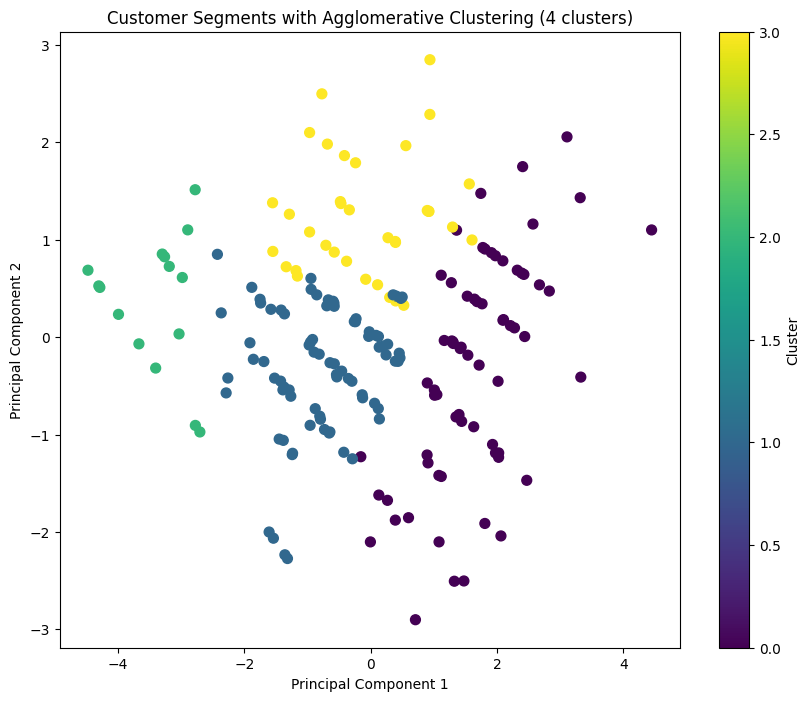

In [8]:
### 11. Visualizing the Clusters
plt.figure(figsize=(10, 8))
plt.scatter(customer_features['PC1'], customer_features['PC2'], c=customer_features['Cluster'], cmap='viridis', s=50)
plt.title(f'Customer Segments with Agglomerative Clustering (4 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()